## Load Libraries

In [2]:
import pandas as pd
from prophet import Prophet

## Load Data



In [3]:
df = pd.read_csv('./BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [5]:
df.columns = ['ds','y']

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [7]:
m = Prophet()
m.fit(df)

21:10:19 - cmdstanpy - INFO - Chain [1] start processing
21:10:19 - cmdstanpy - INFO - Chain [1] done processing


## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados



In [8]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [9]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [10]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [11]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [12]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [13]:
forecast = m.predict(future)

In [14]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.579900,1142.370424,1477.561607,1772.579900,1772.579900,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,0.0,0.0,0.0,1310.862082
1,1992-02-01,1775.428361,1185.865821,1517.127720,1775.428361,1775.428361,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,0.0,0.0,0.0,1348.415300
2,1992-03-01,1778.093050,1441.336514,1760.701497,1778.093050,1778.093050,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,0.0,0.0,0.0,1599.258278
3,1992-04-01,1780.941512,1424.142528,1753.988787,1780.941512,1780.941512,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,0.0,0.0,0.0,1584.828874
4,1992-05-01,1783.698087,1670.715909,1998.445391,1783.698087,1783.698087,45.042535,45.042535,45.042535,45.042535,45.042535,45.042535,0.0,0.0,0.0,1828.740622


In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5203.509436,5071.859417,5396.984995,5191.665055,5215.274310,39.822115,39.822115,39.822115,39.822115,39.822115,39.822115,0.0,0.0,0.0,5243.331550
344,2020-09-01,5219.622856,4928.953999,5261.618777,5206.673419,5232.459960,-133.358699,-133.358699,-133.358699,-133.358699,-133.358699,-133.358699,0.0,0.0,0.0,5086.264157
345,2020-10-01,5235.216488,5024.945995,5351.694544,5220.939820,5249.438470,-43.472269,-43.472269,-43.472269,-43.472269,-43.472269,-43.472269,0.0,0.0,0.0,5191.744219
346,2020-11-01,5251.329908,5174.383602,5492.225556,5235.847544,5266.615829,87.385241,87.385241,87.385241,87.385241,87.385241,87.385241,0.0,0.0,0.0,5338.715149
347,2020-12-01,5266.923541,6178.736690,6495.616519,5250.288075,5283.346061,1070.834676,1070.834676,1070.834676,1070.834676,1070.834676,1070.834676,0.0,0.0,0.0,6337.758217


In [16]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4631.076827,4474.446077,4791.796574
337,2020-02-01,4681.895004,4520.778569,4838.306747
338,2020-03-01,4945.147137,4780.868106,5110.858443
339,2020-04-01,4943.982693,4781.226914,5101.121235
340,2020-05-01,5200.731498,5040.749847,5355.289628
341,2020-06-01,5181.487489,5013.852657,5332.850710
342,2020-07-01,5313.859446,5163.297800,5479.046288
343,2020-08-01,5243.331550,5071.859417,5396.984995
344,2020-09-01,5086.264157,4928.953999,5261.618777
345,2020-10-01,5191.744219,5024.945995,5351.694544


### Graficando los pronósticos


/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


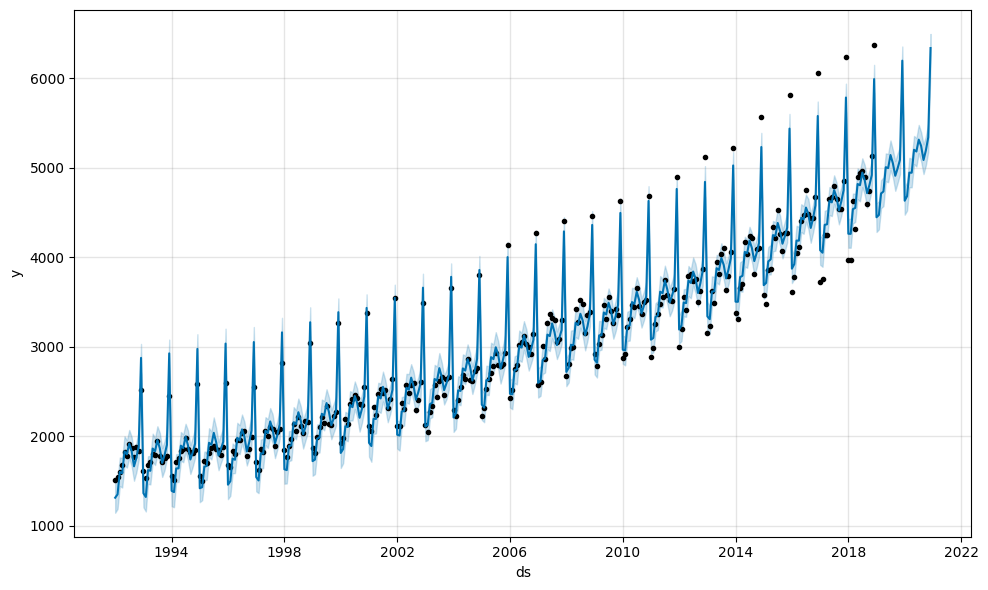

In [18]:
m.plot(forecast);

In [19]:
pd.plotting.register_matplotlib_converters()

(16071.0, 18993.0)

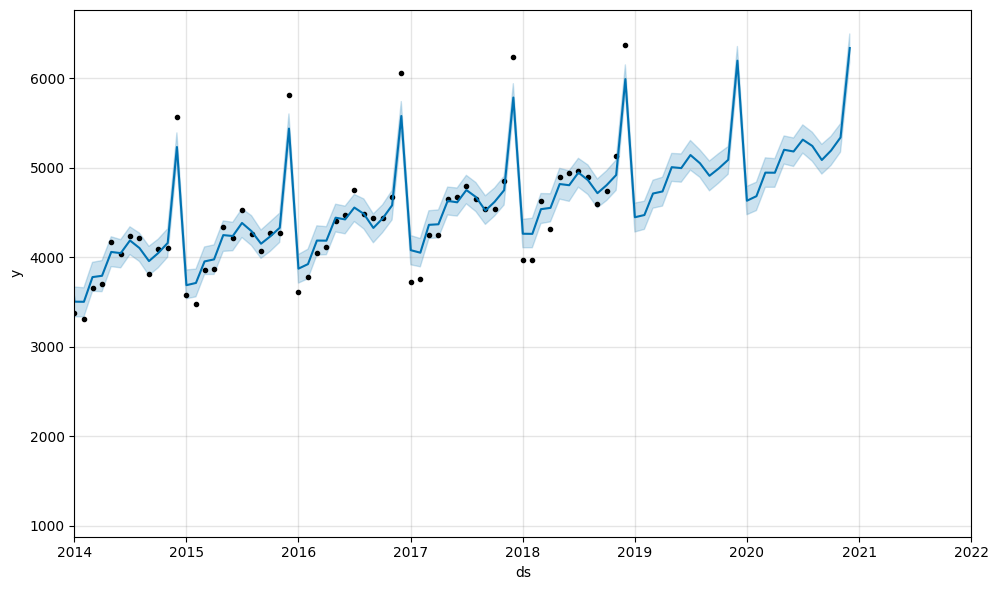

In [20]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

<Axes: xlabel='ds'>

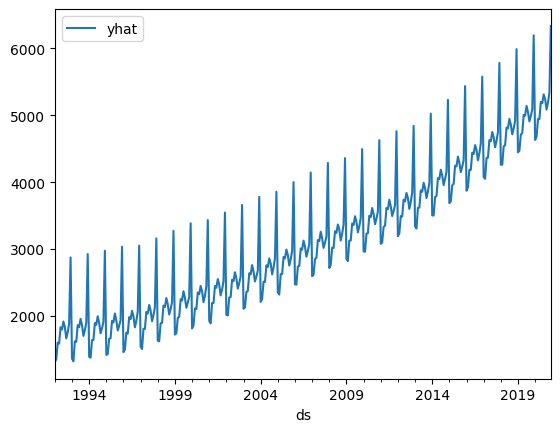

In [21]:
forecast.plot(x='ds',y='yhat')

/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Serie

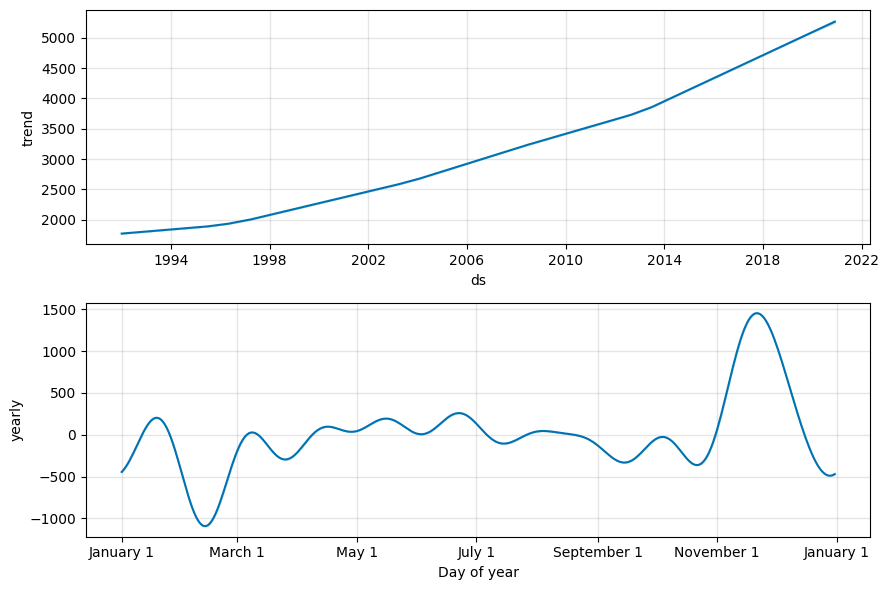

In [22]:
m.plot_components(forecast);
